# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
%matplotlib inline

The following function may be useful for loading the necessary data.

In [44]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

def loss(X, Y, w):
    '''
    Calculate the logistic loss.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    #print(-Y * np.sum(w*X, axis=1))
    return -1 * np.sum(np.log(1/(1+np.exp(-Y * np.sum(w*X, axis=1))))) #- alpha * np.dot(w,w))


def gradient(x, y, w, alpha):
    '''
    Calculate the gradient of the regularized loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The classification label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        alpha: the regularization factor scaled by the number of samples
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    #==============================================
    # TODO: Implement the gradient of the loss function.
    #==============================================    

    return (-y/(1+np.exp(y * np.dot(w,x))) * x + 2*alpha*w )

def SGD(X, Y, w_start, eta, alpha, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, regularization factor alpha, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        alpha: the regularization factor
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    
    
    N = X.shape[0]
    D = X.shape[1]
    alpha = alpha/N
    train_losses = np.zeros(N_epochs)
    test_losses = np.zeros(N_epochs)
    w = w_start
    
    np.random.seed(42)
    for epoch in range(N_epochs):
        X, Y = shuffle(X, Y)
        for i, (x, y) in enumerate(zip(X, Y)):
            w -= eta*gradient(x,y,w, alpha)
        train_losses[epoch] = loss(X,Y,w)
        test_losses[epoch] = loss(X_test,y_test,w)
    return w, train_losses, test_losses

In [45]:
train_data1 = load_data('./data/wine_training1.txt')
train_data2 = load_data('./data/wine_training2.txt')
test_data = load_data('./data/wine_validation.txt')

X_train1 = train_data1[:,1:]
y_train1 = train_data1[:,0]
X_train2 = train_data2[:,1:]
y_train2 = train_data2[:,0]
X_test = test_data[:,1:]
y_test = test_data[:,0]

train_scaler1 = StandardScaler()
X_train1 = train_scaler1.fit_transform(X_train1)
X_train1 = np.append(X_train1, np.ones((X_train1.shape[0],1)), axis=1)
train_scaler2 = StandardScaler()
X_train2 = train_scaler2.fit_transform(X_train2)
X_train2 = np.append(X_train2, np.ones((X_train2.shape[0],1)), axis=1)
test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)
X_test = np.append(X_test, np.ones((X_test.shape[0],1)), axis=1)

In [46]:
alpha_list = [1e-5 * 5**i for i in range(15)]
#alpha_list = alpha_list[:1]
eta = 5e-4
N_epochs = 20000

def train(X_train, y_train):
    
    train_errors = np.zeros(len(alpha_list))
    test_errors = np.zeros(len(alpha_list))
    l2ws = np.zeros(len(alpha_list))
    
    for i, alpha in enumerate(alpha_list):
        np.random.seed(42)
        w_start = np.random.uniform(0,0.01,X_train.shape[1])
        w, train_losses, test_losses = SGD(X_train, y_train, w_start, eta, alpha, N_epochs)
        train_errors[i] = train_losses[-1]/X_train.shape[0]
        test_errors[i] = test_losses[-1]/X_test.shape[0]
        l2ws[i] = np.dot(w, w)
    
    return train_errors, test_errors, l2ws

In [47]:
train_errors1, test_errors1, l2ws1 = train(X_train1, y_train1)

In [48]:
train_errors2, test_errors2, l2ws2 = train(X_train2, y_train2)

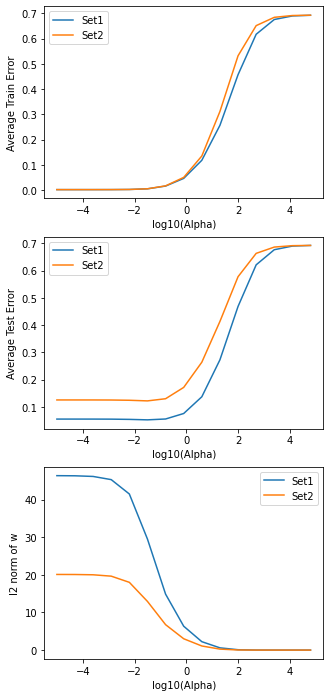

In [53]:
plt.figure(figsize=(5,12))
plt.subplot(3,1,1)
plt.plot(np.log10(alpha_list), train_errors1)
plt.plot(np.log10(alpha_list), train_errors2)
plt.xlabel('log10(Alpha)')
plt.ylabel('Average Train Error')
plt.legend(['Set1', 'Set2'])

plt.subplot(3,1,2)
plt.plot(np.log10(alpha_list), test_errors1)
plt.plot(np.log10(alpha_list), test_errors2)
plt.xlabel('log10(Alpha)')
plt.ylabel('Average Test Error')
plt.legend(['Set1', 'Set2'])

plt.subplot(3,1,3)
plt.plot(np.log10(alpha_list), l2ws1)
plt.plot(np.log10(alpha_list), l2ws2)
plt.xlabel('log10(Alpha)')
plt.ylabel('l2 norm of w')
plt.legend(['Set1', 'Set2'])
plt.savefig('prob2.pdf')